### Just some initial code...

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
from scipy.stats import ttest_ind

# --------Top of def main():--------
# ----Create initial data frames----
hr_df = pd.read_csv('HR_comma_sep.csv')
hr_df.rename(
    columns={
        'sales': 'department',
        'average_montly_hours': 'average_monthly_hours',
        'Work_accident': 'work_accident'},
    inplace=True)
# print(hr_df.groupby('department').count().index)
department_conversion = {
    'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3,
    'management': 4, 'marketing': 5, 'product_mng': 6,
    'sales': 7, 'support': 8, 'technical': 9}
hr_df['department_number'] = hr_df['department'].apply(
    lambda x: department_conversion[x])
salary_conversion = {'low': 0, 'medium': 1, 'high': 2}
hr_df['salary_number'] = hr_df['salary'].apply(lambda x: salary_conversion[x])
left_df = hr_df[hr_df['left']==1]
stay_df = hr_df[hr_df['left']==0]
    

# ----Re-used Helper Functions----
def histogram_set(
        df, x_cols, y_sum_col, overlay=False, show=True, bin_list=None,
        tansparency=1.0, label=None):
    """Return None
    
    This function plots a matrix of histograms, with a histogram chart for
    each column in x_cols, where each bar chart has bins for values in x_cols
    and bars with height equal to the number of elements in that bin. The
    histograms are normalized so that the heights of their columns sum to 1
    (as opposed to their integral over the bins summing to 1).
    """
    width = min([len(x_cols), 3])
    height = math.ceil(len(x_cols) / 3)
    
    if (not overlay):
        plt.figure(figsize=(13, 5))
    
    for i, x in enumerate(x_cols):
        if x:  # We can put place markers so that we can add data later
            plt.subplot(height, width, i+1)
            normalized_weights = (np.ones_like(df[x])
                / float(len(df[x])))
            bins = None
            if bin_list:
                bins = bin_list[i]
            plt.hist(
                df[x], bins=bins, weights=normalized_weights, alpha=0.5,
                label=label)
            plt.title('Total {} by {}'.format(y_sum_col, x))
            plt.xlabel(x)
            plt.ylabel('Total of {}'.format(y_sum_col))
    plt.tight_layout()
    
    if show:
        plt.show()
    
    
def scatter_set_vs_set(
        df, x_cols, y_cols, legend_label=None, marker_size=2.0,
        overlay=False, show=True, transparency=1.0):
    """Return None
    
    This function plots a matrix of scatter plots with all combinations of
        the columns of df listed in x_cols, on the x-axis
    versus
        the columns of df listed in y_cols, on the y-axis
    There will be a row of scatter plots for each column listed in y_cols
    There will be a column of scatter plots for each column listed in x_cols
    """
    # Dimensions of subplots
    width = len(x_cols)
    height = len(y_cols)
    
    if (not overlay):
        plt.figure(figsize=(13, 7))
    
    for i, y in enumerate(y_cols):
        for j, x in enumerate(x_cols):
            if x != y:
                plt.subplot(height, width, (i*width)+(j+1))
                plt.plot(
                    df[x], df[y], '*', markersize=marker_size,
                    label=legend_label, alpha=transparency)
                plt.title('{}\nvs. {}'.format(x, y))
                plt.xlabel(x)
                plt.ylabel(y)
                if legend_label and i==0 and j==0:
                    plt.legend()
    plt.tight_layout()
    
    if show:
        plt.show()


def boxplot_set_vs_set(
        df, df_bins, x_cols, y_cols, legend_label=None, overlay=False,
        show=True, color=None, line_width=None):
    """Return None
    
    This function plots a matrix of box plots with all combinations of
        the columns of df listed in x_cols, on the x-axis
    versus
        the columns of df listed in y_cols, on the y-axis
    There will be a row of scatter plots for each column listed in y_cols
    There will be a column of scatter plots for each column listed in x_cols
    """
    # Dimensions of subplots
    width = len(x_cols)
    height = len(y_cols)
        
    if (not overlay):
        plt.figure(figsize=(13, 7))
        
    for i, y in enumerate(y_cols):
        for j, x in enumerate(x_cols):
            if x == y:
                plt.subplot(height, width, (i * width) + (j + 1))
                plt.axis('off')
                break
            subplot_data = []
            bin_names = ['']
            unique_values = df_bins[x].unique()
            unique_values.sort()
            
            # If there are <= 10 x-values, use them as bins for each box plot
            if len(unique_values) <= 10:
                # Get the data for each bin's boxplot
                for unique_value in unique_values:
                    subplot_data.append(df[df[x]==unique_value][y])
                    bin_names.append(unique_value)
                    
            # Else separate x-values into bins
            else:
                bin_size = (max(unique_values) - min(unique_values)) / 10
                bin_start = min(unique_values)
                bin_end = bin_start + bin_size
                
                # Get the data for each bin's boxplot
                for count in range(10):
                    if count == 0:
                        subplot_data.append(
                            df[(bin_start<=df[x]) & (df[x]<=bin_end)][y])
                        bin_names.append(
                            "{:02.2f} - {:02.2f}".format(bin_start, bin_end))
                        #bin_names.append(
                        #   "{} <= x <= {}".format(bin_start, bin_end))
                    else:
                        subplot_data.append(
                            df[(bin_start<df[x]) & (df[x]<=bin_end)][y])
                        bin_names.append(
                            "{:02.2f} - {:02.2f}".format(bin_start, bin_end))
                        #bin_names.append(
                        #   "{} < x <= {}".format(bin_start, bin_end))
                    bin_start = bin_end
                    bin_end += bin_size
            # Draw the boxplots with descriptors
            plt.subplot(height, width, (i * width) + (j + 1))
            bp = plt.boxplot(
                subplot_data, labels=([legend_label] * (len(bin_names) - 1)))
            if line_width:
                for part in bp.keys():
                    plt.setp(bp[part], linewidth=line_width)
            if color:
                for part in bp.keys():
                    plt.setp(bp[part], color=color)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.xticks(
                range(len(bin_names)), bin_names, rotation='vertical')
            plt.tight_layout()
            plt.title('{}\nvs. {}'.format(x, y))
    if show:
        plt.show()


# ----One Time Helper Functions----
def data_vis1(
        hr_df, left_df, labels=('Left', 'Staying'),
        colors = ['gold', 'yellowgreen'], bins=range(0, 11)):
    count_left = len(left_df)
    count_stay = len(hr_df) - count_left
    sizes = [count_left, count_stay]
    explode = (0.1, 0)  # explode 1st slice
     
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 3, 1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Percent of Employees That Left')
    
    # Distribution leavers' time spent at company
    plt.subplot(1, 3, 2)
    # Simply setting normed=True makes the integral of the histogram = 1,
    # not cumulative heights, so we use weights instead
    normalized_weights = (np.ones_like(left_df['time_spend_company'])
        / float(len(left_df['time_spend_company'])))  
    plt.hist(
        left_df['time_spend_company'],
        weights=normalized_weights, bins=bins)
    time_average = np.mean(left_df['time_spend_company'])
    plt.axvline(x=time_average, label='Average', color='red')
    plt.text(
        time_average, 0.3, "x={:04.2f}".format(time_average))
    plt.title('Distribution of Years Spent\n At Company, If Left')
    plt.ylim([0, 0.6])
    plt.xlabel('Years Spent At Company')
    plt.ylabel('Percent Employees')
    plt.legend()
    
    # Distribution leavers' time spent at company
    plt.subplot(1, 3, 3)
    normalized_weights = (np.ones_like(hr_df['time_spend_company'])
        / float(len(hr_df['time_spend_company'])))
    plt.hist(
        hr_df['time_spend_company'],
        weights=normalized_weights, bins=bins)
    time_average = np.mean(hr_df['time_spend_company'])
    plt.axvline(x=time_average, label='Average', color='red')
    plt.text(
        time_average, 0.3, "x={:03.2f}".format(time_average))
    plt.title('General Distribution of Years\nSpent At Company')
    plt.ylim([0, 0.6])
    plt.xlabel('Years Spent At Company')
    plt.ylabel('Percent Employees')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(ttest_ind(left_df['time_spend_company'], hr_df['time_spend_company'], equal_var=False))
    
    
def data_vis2(hr_df, left_df):
    # Plot quality employees that left
    evaluation_bins = np.multiply(0.1, range(0,11))
    subplot_bins = [evaluation_bins, None, None]
    histogram_set(
        left_df,
        ['last_evaluation', 'promotion_last_5years', 'salary_number'],
        'Employees', show=False, tansparency=0.6,
        bin_list=subplot_bins, label='Employees That Left')
    
    # Overlay all quality employees
    histogram_set(
        hr_df,
        ['last_evaluation', 'promotion_last_5years', 'salary_number'],
        'Employees', overlay=True, show=False, tansparency=0.6,
        bin_list=subplot_bins, label='All Employees')
    
    # Set labels afterwards
    plt.subplot(1, 3, 2)
    plt.xticks(range(2), ('No', 'Yes'))
    plt.xlabel('Promotion in the Last 5 Years')
    plt.subplot(1, 3, 3)
    plt.xticks(range(3), ('Low', 'Medium', 'High'))
    plt.xlabel('Salary')
    plt.legend(loc='upper right')
    
    plt.show()
    

def data_vis3(stay_df, left_df):
    x_values = [
        'number_project', 'average_monthly_hours',
        'time_spend_company', 'last_evaluation']
    y_values = ['satisfaction_level', 'last_evaluation']
    scatter_set_vs_set(
        left_df, x_values, y_values, legend_label='Left', show=False,
        transparency=0.5, marker_size=4)
    
    scatter_set_vs_set(
        stay_df, x_values, y_values, legend_label='Stay', overlay=True,
        transparency=0.1, marker_size=2)
    
    
def data_vis4(stay_df, left_df, hr_df):
    x_values = [
        'number_project', 'average_monthly_hours',
        'time_spend_company', 'last_evaluation']
    y_values = ['satisfaction_level']
    boxplot_set_vs_set(
        stay_df, hr_df, x_values, y_values, legend_label='Stay',
        show=False, color='red', line_width=1.5)
    
    boxplot_set_vs_set(
        left_df, hr_df, x_values, y_values, legend_label='Left',
        overlay=True, color='blue')
    
    x_values = [
        'number_project', 'average_monthly_hours',
        'time_spend_company', 'last_evaluation']
    y_values = ['last_evaluation']
    boxplot_set_vs_set(
        stay_df, hr_df, x_values, y_values, legend_label='Stay',
        show=False, color='red', line_width=1.5)
    
    boxplot_set_vs_set(
        left_df, hr_df, x_values, y_values, legend_label='Left',
        show=False, overlay=True, color='blue')
    
    # Draw legend
    red_line = mlines.Line2D([], [], color='blue',
        markersize=15, label='Employees That Left')
    blue_line = mlines.Line2D([], [], color='red',
        markersize=15, label='Employees That Did Not Leave')
    handles = [red_line, blue_line]
    labels = [h.get_label() for h in handles]
    plt.legend(handles=handles, labels=labels) 
    plt.show()
    

# Employee Data: A Resource for Human Resources
#### Human Resources is responsible for acquiring and maintaining a quality employee population at a company. A large part of this task is employee retention, preventing employees from leaving prematurely.

## The Problem: Why is the talent leaving?
This data set came from Kaggle (https://www.kaggle.com/ludobenistant/hr-analytics) and is fictional and simulated. The data is meant to be analysed to find the factors correlated to whether or not an employee leaves the company.

The description connected to the data set hints at relevant aspects of the data to consider. In the description of the data, "Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next."

Two characteristics are suggested to be of interest and potentially interrelated:
  * Data determining if an employee is likely to leave the company (primary concern)
  * Data determining if an employee is the best and most experienced (secondary concern)
  
There is also a minor characteristic of how to determine whether or not an employee leaving is considered premature.


## Defining Measurements: Know what is "best"
The data collected about employees are satisfaction level (0 to 1, higher being more satisfied), last evaluation score (0 to 1, higher being better performance), number of projects working on, average monthly hours worked, years spent at company, work accident (0 if employee did not have an accident and 1 if they did), whether the employee left or not (0 if the employee has not left and 1 if they have ), whether or not they received a promotion in the last 5 years (0 if the employee has had a promotion in the last 5 years and 1 if they have not), department employee is in, and salary level (low, medium, or high).

So that we can approach the problem scientifically, let us concretely define measurements for terms used such as "best":<br>
<strong>Best employees</strong>: employees with higher scores on their last evaluation<br>
  <i>Other considerations:</i>
  * Promotion in last 5 years
  * High salary

<strong>Experienced employees</strong>: employees that spent the longest time working at the company<br>
  <i>Other considerations:</i>
  * Most monthly hours
  * Most projects
  
<strong>Prematurely left</strong>: any employee was labeled as having left (will assume they were not labeled as such if they werer not leaving prematurely)<br>
#### Having resolved some abiguity, let's approach our problem.

## Overview of the Problem: Validate the question
### Are many employees actually leaving?
Yes, looking at the pie chart (below) on the left, with almost 24% of all employees hired having left, there is a significant amount of employees that left. We cannot determine the rate that employees are leaving without the timeframe of the study, but we can see that every one of four hires leaves.

Obviously, this piece of information is not indicative by itself, for these employees could have all left at once (very alarming) or been replacements for a single position or team that opens and closes periodically (less alarming and maybe even expected).

The histograms on the right, show the employees' time at the company (distribution of those who left against those who stayed on the right). We can see that a little less than half of employees who left spent about 3 years at the company, with about 25% who spent 4 years and 25% who spent 5 or 6 years at the company. Very few employees with less than 3 years experience leave.

### ...and are they experienced employees?
Yes, the employees that left are more experienced (defined as having spent longer at the company. The average time spent at the company for employees who left is 3.88 years, and is higher than the average of time spent at the company for the general employee population, which is 3.5 years.

While this may seem like a small difference in the scheme of up to 10 years spent at the company, the chances of this difference in the averages occurring due to chance by variance is essentially zero (probability = p-value = $2.89*10^{-79}$).

This  supports the assertion that those leaving the company are more likely to be more experienced employees, but not necessarily likely to be extremely more experienced.

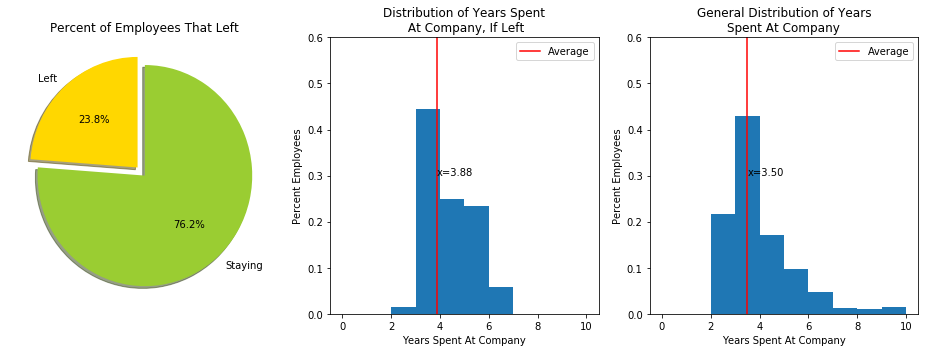

Ttest_indResult(statistic=18.685511554151301, pvalue=2.8933582354353554e-76)


In [33]:
# Percentage that left vs. stayed
data_vis1(hr_df, left_df)


## Detail the Problem: Who is leaving?
### They were the best of employees and they were the worst of employees.
Based on our measure of an employee's quality by their <strong>last evaluation score</strong>, we can see that those leaving form two larger groupings: lower evaluated employees and higher evaluated employees. Lower evaluated employees(with scores of 0.6 or less) consisted of a little less than half of the employees that left, and higher evaluated employees (with scores of 0.8 or more) containing a little more than half of the employees. This is different than the distribution of the general employee body, and so this suggests that average evaluated employees are less likely to leave. We can see the discrepancy between the two populations, as a large portion of the general employee population occupies the evaluation range between the two mentioned groups (from 0.6 to 0.8).

The <strong>promotion</strong> of distribution shows that almost all employees that left were without promotions in the last 5 years. This skew could be very significant in its extremity, but the general population of employees has a similar distribution, so it is not especially useful. If an employee leaves, they are highly likely to have not had a promotion in the last 5 years, but so are the employees that stay.

Looking at <strong>salaries</strong>, we can see that there are many low salary employees, a medium amount of medium salary employees, and very few high salary employees in the employee population. There are, relatively, more low salary (~60% vs. ~50%) and less medium (~37% vs. ~42%) and high salary (~2% vs ~8%) employees among those that left, than there are in the general employee population, so an employee is a little more likely to leave if they have a low salary.

Those leaving are generally either good or bad employees, but not average, and similar to the general employee population as far as promotions or salary.

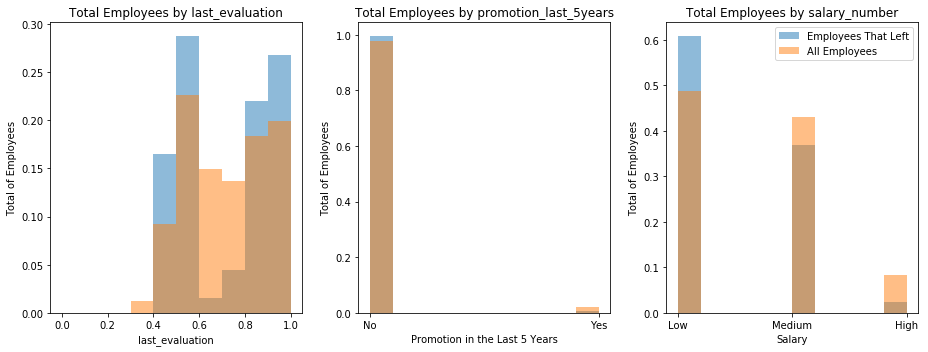

In [34]:
# Draw histograms to find leaver correlations with other factors
data_vis2(hr_df, left_df)

## Visualize the Solution: Why are they leaving?
### Are there groups to employees leaving?
Here we try to find data ranges or patterns for employees that left (using the scatter plots below to visualize clusters).

<strong>Employee Satisfaction Correlations</strong> (top rows of scatter plots and box plots):
  * There are three groups of employees based on number of projects and satisfaction rating: a group with few projects (2) that were slightly satisfied, a group with a medium amount of projects with high satisfaction (4 or 5), and a group with the most projects (5-7) that are very unsatisfied.
  * There are three groups, which structure seems to correlate with previous plot (number of projects), with a group with the least hours worked per month with slight satisfaction (100-175 hours), another with high satisfaction and many hours (225-275 hours), and another with very low satisfaction and the most hours (290-310 hours).
  * There are three groups, where employees with 3 years at the company are slightly satisfied, 4-5 years that are unsatisfied, and 5 to 6 years that are very satisfied. 
  * There are three groups, where employees with low evaluation are slightly satisfied (0.4-0.6 evaluation scores), with high evaluation and lowest satisfaction (0.78-0.98 evaluation scores), and a group with the highest satisfaction and evaluation scores (0.8-1.0 evaluation scores). 

<strong> Employee Evaluation Correlations</strong> (bottom rows of scatter plots and box plots):
  * There are three groups, one with 2 projects and low evaluation scores, another with 4 or 5 projects with the highest evaluation scores, and a third with 6 to 7 projects, and high evaluation scores.
  * There are three groups, which structure seems to correlate with previous plot (number of projects), with a group with the least hours worked per month with slight satisfaction (100-175 hours), another with the highest satisfaction and many hours (225-275 hours), and another with very low satisfaction and the most hours (290-310 hours).
  * There are three groups, where employees with 3 years at the company have very low evaluations, 4-5 years that have very high evaluation scores, and 5 to 6 years that also have high evaluation scores, if not the highest. 

In each case of metrics for workload, there seems to be three groups (intuitively cross-referencing charts):
  * <strong>The "underworked"</strong>: a group with the lowest evaluation scores, slightly satisfied, and lowest workload.
  * <strong>The "sweet spot"</strong>: a group where satisfaction and evaluation scores are highest, with near but not quite the highest workload.
  * <strong>The "overworked"</strong>: a group with high evaluation scores, but are very unsatisfied, and have the highest workload.

Note, there is a fourth group in each, where the employee does not belong to either of these three mentioned groups, but this fourth group is neither sizeable, dense, nor patterned, so it is of less concern.

### Are there groups to employees not leaving?
There also seem to be dense, defined groups of employees that did not leave. Importantly, these groups of employees that did not leave do not follow the same patterns as the employees that left, and so do not occupy the same data ranges, to same relative degree.

To find the greatest chance of an employee to leave, we want to identify the employees that are in the data ranges of employees that left and most out of ranges of groups that did not leave. These groups have overlapping data ranges, so choosing an entire group will likely not be the most statistically likely way to see if an employee is likely to leave, instead we may want to take subsections of each of the three groups.

Let us look at data ranges to indentify the subsections of interest.

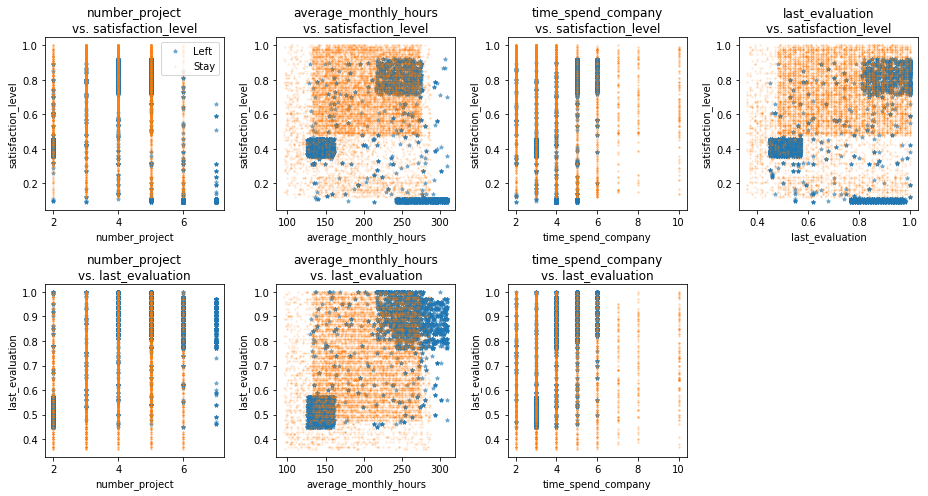

In [35]:
# Plot scatter plots to find meaningful correlations
data_vis3(stay_df, left_df)

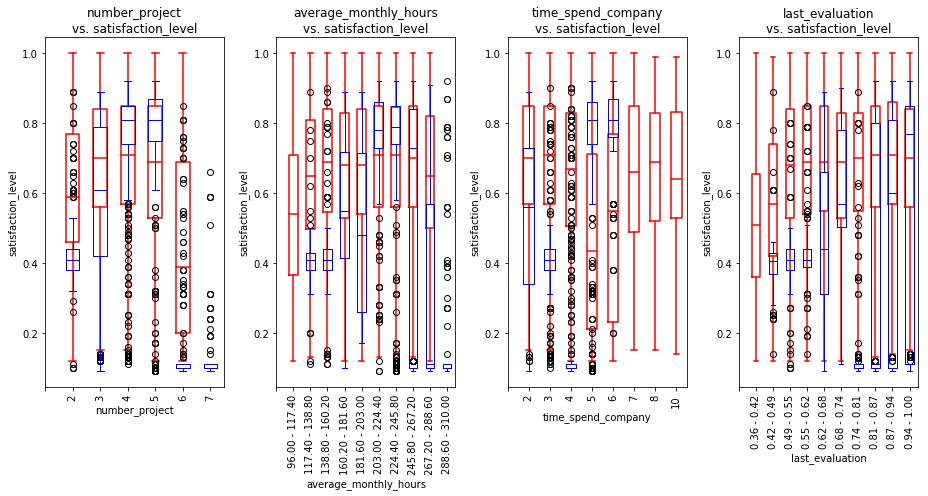

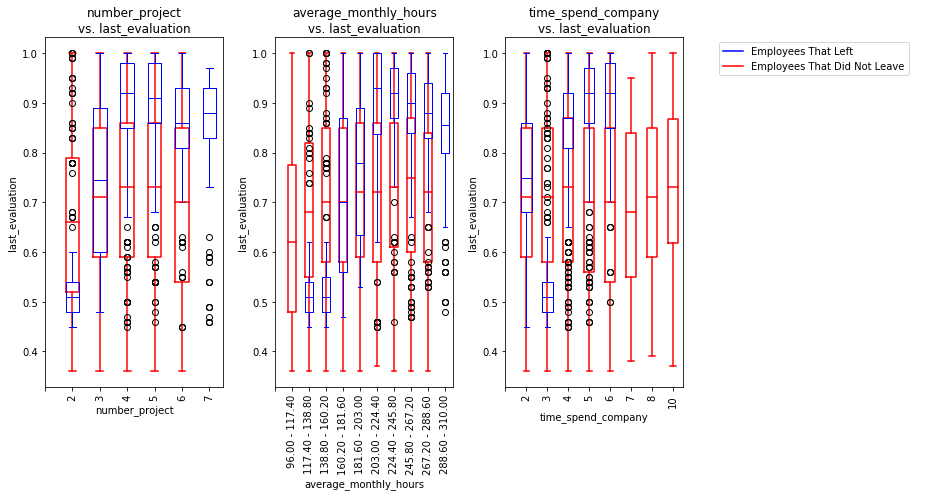

In [36]:
# Plot scatter plots to find meaningful correlations
data_vis4(stay_df, left_df, hr_df)

## Conclusions
### Inside population of leavers, outside population of non-leavers
#### Find subsections of the three groups of leavers more likely to leave
Using the boxplots, above, we can identify data ranges that contain employees more likely to leave. Note that the population percentages stated below are not of each group's population, as we have not separated the data in this way. The populations percentages, stated below, are of employee populations that left and employee populations that stayed in each data range. The group label headers simply show which groups the data ranges fall into, using the knowledge inferred from cross-referencing the scatter plots.

Below are data ranges of employee groups that contain a high percentage of the population of employees that left and low percentage of the population of employees that stayed.

### "Underworked" Group Likely Data Ranges
 *  <strong>Number of Projects</strong> <= 2 and 0.3 < <strong>Satisfaction Level</strong> <= 0.44: for number of projects <= 2,  75% of population that left and at most 25% of population that did not leave had satisfaction levels between 0.3 and 0.44.
 *  117.4 < <strong>Average Monthly Hours Worked</strong> <= 160.2 and Satisfaction Level <= 0.49: for average monthly hours worked between 117.4 and 160.2, 100% of population that left and at most 25% of population that did not leave had satisfaction levels <= 0.49.
 * <strong>Years Spent at Company</strong> == 3 and Satisfaction Level <= 0.49: for 3 years spent at the company, 100% of population that left and at most 25% of population that did not leave had satisfaction levels <= 0.49.
 * 0.42 < <strong>Last Evaluation</strong> <= 0.68 and Satisfaction Level <= 0.5: for evaluation scores greater than 0.42 and less than or equal to 0.68, columns contained 100%, 100%, 100%, and at least 50% of population that left and  at most 50%, 25%, 25%, 25% of population that did not leave (respectively and in increasing order), and had satisfaction levels <= 0.5.


 * <strong>Number of Projects</strong> == 2 and <strong>Last Evaluation</strong> <= 0.6: for number of projects equal to 2, 100% of population that left and at most 50% of population that did not leave had last evaluations <= 0.6.
 * 117.4 < <strong>Average Monthly Hours</strong> <= 160.2 and Last Evaluation <= 0.62: for average monthly hours greater than 117.4 and less than or equal to 160.2, 100% of population that left and at most 50% of population that did not leave had last evaluations <= 0.62.
 * <strong>Years Spent at Company</strong> == 3 and Last Evaluation <= 0.57: for year spent at company equal to 3, at least 75% of population that left and at most 25% of population that did not leave had last evaluations <= 0.57.
 
 
### "Sweet Spot" Group Likely Data Ranges
 * 5 <= <strong>Years Spent at Company</strong> <= 6 and <strong>Satisfaction Level</strong> >= 0.71: for 5 years spent at the company, at least 75% of population that left and at most 25% of population that did not leave had satisfaction levels >= 0.71. For 6 years spent at the company, 100% of population that left and at most 50% of population that did not leave had satisfaction levels >= 0.71


 * 4 <= <strong>Number of Projects</strong> <= 5 and <strong>Last Evaluation</strong> >= 0.855: for number of projects equal to 4, at least 50% of population that left and at most 25% of population that did not leave had last evaluations >= 0.855. For number of projects equal to 5, at least 75% of population that left and at most 25% of population that did not leave had last evaluations >= 0.855.
 * 203 < <strong>Average Monthly Hours</strong> <= 288.6 and Last Evaluation >= 0.866: for average monthly hours greater than 203 and less than or equal to 288.6, columns had at least 50%, 75%, 50%, and 50% of population that left and at most 25% of population that did not leave (respectively and in increasing order), and had last evaluations >= 0.866.
 * 5 <= <strong>Years Spent at Company</strong> <= 6 and Last Evaluation >= 0.845: for 5 to 6 years spent at the company, at least 75% of population that left and at most 25% of population that did not leave, had last evaluations >= 0.845.
 
### "Overworked" Group Likely Data Ranges
 *  <strong>Number of Projects</strong> >= 6 and <strong>Satisfaction Level</strong> <= 0.11: for number of projects >= 6, almost 100% of population that left and 0% of population that did not leave had satisfaction levels <= 0.11. All employees that had 7 projects (the most number of projects of all employees) left.
 *  <strong>Average Monthly Hours Worked</strong> >= 267.2 and Satisfaction Level <= 0.11: for average monthly hours worked between  267.2 and 288.6, 50% of population that  left and 0% of population that did not leave had satisfaction levels <= 0.11. For average monthly hours worked over 288.6, all employees left. 
 * <strong>Years Spent at Company</strong> == 4 and Satisfaction Level <= 0.11: for 4 years spent at the company, 100% of population that left and 0% of population that did not leave had satisfaction levels <= 0.11.
 * <strong>Last Evaluation</strong> > 0.74 and Satisfaction Level <= 0.12: for evaluation scores greater than 0.74, columns contained 100%, 50%, 50%, and 50% of population that left and 0% of population that did not leave had satisfaction levels <= 0.12.


 * <strong>Number of Projects</strong> >= 5 and <strong>Last Evaluation</strong> >= 0.855: for number of projects equal to 5, at least 75% of population that left and at most 25% of population that did not leave had last evaluations >= 0.855. For number of projects equal to 6, at least 50% of population that left and at most 50% of population that did not leave had last evaluations <= 0.855. Only employees that left had 7 projects.
 * 203 < <strong>Average Monthly Hours</strong> and Last Evaluation >= 0.866: for average monthly hours greater than 203 and less than or equal to 288.6, the columns had at least 50%, 75%, 50%, and 50% of population that left and at most 25% of population that did not leave (respectively and in increasing order), and had last evaluations >= 0.866. For average monthly hours greater than 288.6, all employees left.
 * <strong>Years Spent at Company</strong> = 5 and Last Evaluation >= 0.845: for 5 years spent at the company, at least 75% of population that left and at most 25% of population that did not leave, had last evaluations >= 0.845.

#### Employees that fit into these data ranges are more likely to leave the company. If an employee that has not left the company exists in these data ranges, it is predicted they would, on average, have a higher likelihood to leave the company than a randomly chosen employee that has not left the company.

## Problems
### Missing data
 *  We do not know what exactly what the variable "left" means, whether this includes being laid off or fired.
 *  We do not know if a promotion in the last 5 years refers to the last 5 years of the employee's career at the company or 5 years from the date that this data was generated.
 * We do not know what "number of projects working on" means, the average over their time at the company, when the survey was taken, etc.
 * We do not know how an employee was evaluated in their last evaluation, and if it is a proper metric for employee quality and determining if they are the "best" employees.
 * We do not know the time range of this data or what date the employees left or were hired on. It would be interesting to see if many employees left at the same time and or how fast these 25% of hires left.
 * It would be interesting to see what teams or managers employees had, and to find if it was related to an employee's likelihood to have left.
 * Factors about the company as a whole like stock value, profits, total size, benefits, etc. would be interesting to correlate to whether employees left or not.



## Further research and solutions
It would be useful to separate the charts by the three groups of employees that left, to confirm beyond a doubt that these were indeed populations with common individuals, and so that their populations did not overlap in the bar charts in shared data ranges. It would also be interesting to show a heat map with relative heat intensities on the scatter plots.

I would like to see if the employees leaving was due to some categorical reason, such as many leaving from a single department or having a work accident or not. Also, cross-referencing the three groups in each of the scatter plots to ensure they are indeed the same populations would be a logical step in further work, as well as finding groups within these groups that are disjoint from dense groups of employees that have not left.

Getting the missing data aforementioned would be useful for further studies. It would be nice to work on real-world data in the future as well.  It would be interesting to see if an employee's previous work experience could be used to determine their likelihood to stay with the company (i.e. how many years they worked at companies before, reason for leaving, industry, etc.). Also learning the statistical difference between causation and correlation might be useful in determining patterns in the data.

Calculating (Baysian) probabilities for the likelihood of employees in the data ranges of these three groups to leave would be interesting and likely reveal more concrete statistics. A clustering algorithm seems an interesting method to apply to classify these groups. Also, applying logistic regression across multiple variables would be interesting to do as well. It would also be interesting to research the most common causes for an employee to leave a job and create classifiers based on these aspects.